# Prueba

In [4]:
from project_3.QAA import QAA  
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime
from scipy.optimize import minimize
from scipy.spatial.distance import squareform
from scipy.cluster.hierarchy import linkage, dendrogram, leaves_list

[*********************100%%**********************]  5 of 5 completed



Optimal Portfolio Weights for MIN VARIANCE QAA using SLSQP optimization:
ABBV    0.25
MET     0.25
OXY     0.25
PERI    0.25
Name: Optimal Weights, dtype: float64

---

Portfolio Return: 0.13%
Benchmark Return (SPY): 0.06%
Risk-Free Rate Return: 0.01%

---

Portfolio Volatility: 2.23%
Benchmark Volatility (SPY): 1.42%
Risk-Free Rate Volatility: 0.00%

---



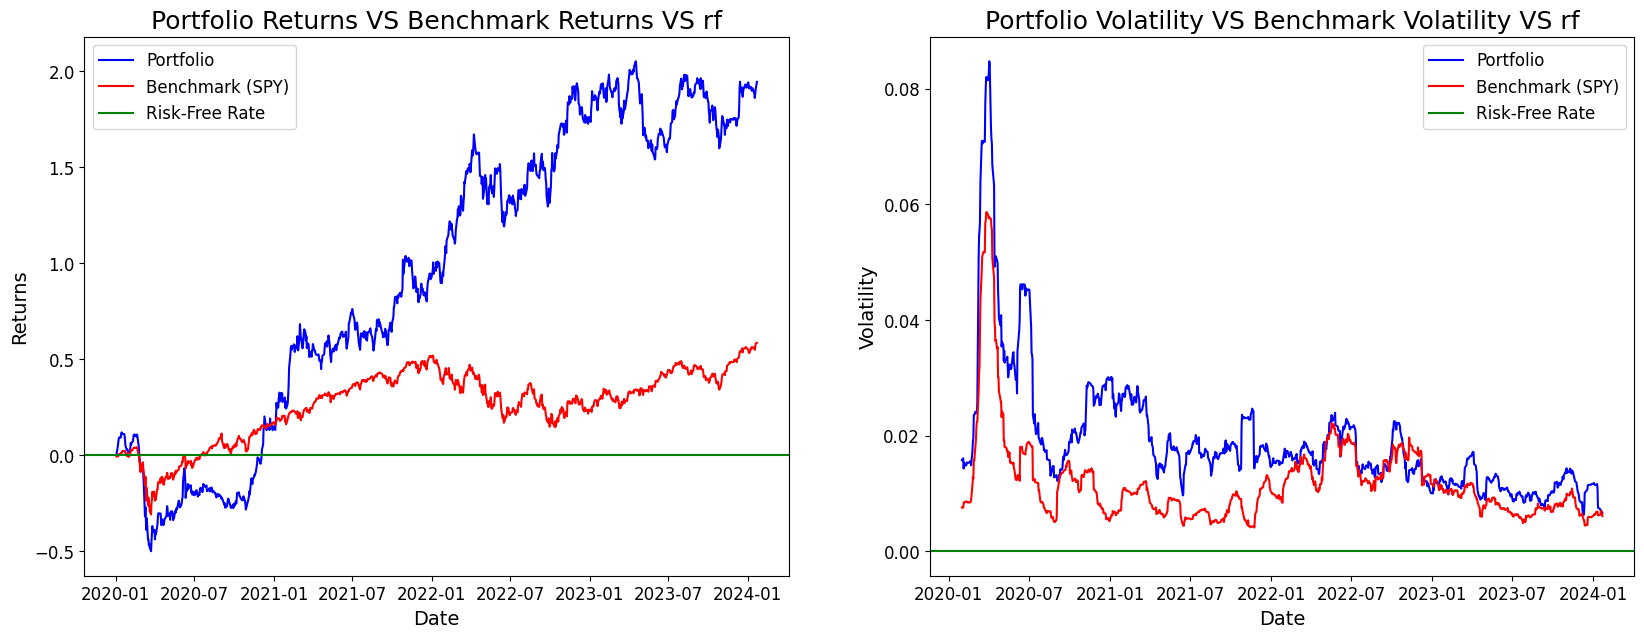

In [5]:
qaa_instance = QAA(
    tickers=["ABBV", "MET", "OXY", "PERI"],
    benchmark="SPY",
    rf=0.02,
    lower_bound=0.1,
    higher_bound=0.9,
    start_date="2020-01-02",
    end_date="2024-01-23",
    expected_returns=np.array([.15, .1, .1, .1]),
    opinions=np.array([[1, 0, 0, 0], [0, 1, -3, 0], [0, 0, 1, -1], [0, 0, 0, 0]]),
    MAR=0.2,
    optimization_model="SLSQP",
    #optimization_model="MONTECARLO",
    #optimization_model="GRADIENT DESCENT",
    QAA_strategy="MIN VARIANCE",
    #QAA_strategy="MAX SHARPE RATIO",
    #QAA_strategy="OMEGA",
    #QAA_strategy="SEMIVARIANCE",
    #QAA_strategy="SORTINO RATIO",
    #QAA_strategy="BLACK LITTERMAN",   # NO CORRE CON "GRADIENT DESCENT"
    #QAA_strategy="HRP",
    #QAA_strategy="ROY SAFETY FIRST RATIO",
    #QAA_strategy=""
    #QAA_strategy=""
    #QAA_strategy=""
)

try:
    data, returns, std, var, cov, corr = qaa_instance.assets_metrics()

    optimal_weights = qaa_instance.QAA_strategy_selection(returns=returns)

    qaa_instance.portfolio_metrics(returns)

except ValueError as ve:
    print(f"Error: {str(ve)}")


In [8]:
import yfinance as yf
from pypfopt.expected_returns import mean_historical_return
from pypfopt.risk_models import sample_cov
from pypfopt.efficient_frontier import EfficientFrontier
import pandas as pd

# Define los tickers y las fechas de inicio y fin
tickers = ['ABBV', 'MET', 'OXY', 'PERI']
start_date = "2020-01-01"
end_date = "2023-01-01"

# Descarga los datos de precios
data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']

# Calcula los retornos esperados y la matriz de covarianza
expected_returns = mean_historical_return(data)
cov_matrix = sample_cov(data)

# Optimización de la cartera con EfficientFrontier
ef = EfficientFrontier(expected_returns, cov_matrix)

# Restricción para que todos los activos tengan al menos un 10% en el portafolio
ef.add_constraint(lambda w: w >= 0.10)

# Maximiza el índice Sharpe (ajustándose a las nuevas restricciones)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()

# Muestra los pesos de la cartera optimizada
print(cleaned_weights)


[*********************100%%**********************]  4 of 4 completed


OrderedDict([('ABBV', 0.58616), ('MET', 0.1), ('OXY', 0.1), ('PERI', 0.21384)])
